## Importing Libs 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from models import *
from layers import *
from train import *
from test import *
from vision_dataloaders import *
from plots import *
from torchsummary import summary

In [3]:
from copy import deepcopy

In [4]:
from albumentations import Cutout

## Load Data 

### Getting normalization values

In [5]:
tfm_names = ['tensor']

In [6]:
tfms = create_transform(tfm_names)

In [7]:
data = VisionData.load(tfms=tfms,train=True)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
u,s=data.images.mean((0,1,2))/255,data.images.std((0,1,2))/255

In [9]:
u,s

(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

In [10]:
tfm_names = ['normalize','tensor']


In [ ]:
tfms = create_transform(tfm_names=tfm_names,norm_constants=(u,s))

In [ ]:
tfms

In [ ]:
data = VisionData.load(tfms=tfms,train=True)

### Verifying our normalization


In [ ]:
imgs=[]
for i in range(len(data)):
    imgs.append(data[i][0])

In [ ]:
imgs = torch.stack(imgs)

In [ ]:
imgs.mean((0,2,3)),imgs.std((0,2,3))

### Trying augmentations 

In [11]:
aug_data = VisionData.load(name='CIFAR10')

Files already downloaded and verified
Files already downloaded and verified


In [12]:
img=[aug_data.images[20]]*32

In [13]:
aug_data.images=np.array(img)

In [14]:
assert np.allclose(aug_data[0][0],aug_data[1][0])

In [20]:
#tfms = create_transform(tfm_names=['cutout','tensor'],angle=15,cutout_size=8,cutout_fillvalue=u)
tfms = create_transform(tfm_names=['normalize','cutout','tensor'],angle=15,cutout_size=16,cutout_fillvalue=u,norm_constants=(u,s),cutout_prob=0.75)

In [21]:
aug_data.tfms=tfms

In [22]:
tfms

Compose([
  Normalize(always_apply=False, p=1.0, mean=[0.49139968 0.48215841 0.44653091], std=[0.24703223 0.24348513 0.26158784], max_pixel_value=255.0),
  Cutout(always_apply=False, p=0.75, num_holes=1, max_h_size=16, max_w_size=16),
  ToTensor(always_apply=True, p=1.0, num_classes=1, sigmoid=True, normalize=None),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

Compose([
  Normalize(always_apply=False, p=1.0, mean=[0.49139968 0.48215841 0.44653091], std=[0.24703223 0.24348513 0.26158784], max_pixel_value=255.0),
  Cutout(always_apply=False, p=0.75, num_holes=1, max_h_size=16, max_w_size=16),
  ToTensor(always_apply=True, p=1.0, num_classes=1, sigmoid=True, normalize=None),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

In [23]:
isCUDA = torch.cuda.is_available()
dev = torch.device('cuda') if isCUDA else torch.device('cpu')
dataloader_args = dict(shuffle=True,num_workers=4,batch_size = 8,pin_memory=True) if isCUDA else dict(shuffle=True,batch_size = 8//2)
dl=getDataLoader(aug_data,**dataloader_args)

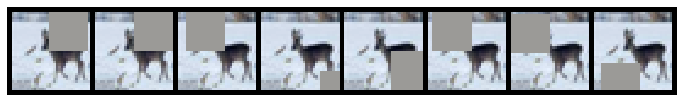

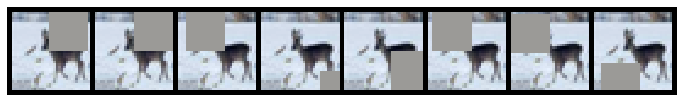

In [24]:
show_batch(dl)

### Defining DataLoaders

In [ ]:
tfms = create_transform(tfm_names=['rotate','jitter','normalize','cutout','tensor'],norm_constant=(u,s),angle=15,cutout_size=16,
                        cutout_fillvalue=u,cutout_prob=0.75)

In [26]:
train_data = VisionData.load(name='CIFAR10',tfms=tfms,train=True)
test_data = VisionData.load(name='CIFAR10',tfms=tfms,train=False)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [27]:
train_dl,test_dl = getTrainTestLoader((train_data,test_data),BS=64)

## Model development 

In [ ]:
model = ResNet(drop=True,p=0.15).cuda()

In [30]:
#model

In [31]:
#summary(model,input_size=(3,32,32))

## Training Model 

In [35]:
opt = optim.SGD(model.parameters(),lr=1e-3,momentum=0.9)
dls={}
dls['train']=train_dl
dls['valid']=test_dl
loss_func = nn.CrossEntropyLoss()
#sched = StepLR(opt,step_size=15,gamma=0.3)

In [ ]:
ldict = train(model,opt,dls,loss_func,40,scheduler=sched,device='cuda')

Training Loss:1.476, Training Acc:50.000: 100%|██████████| 782/782 [00:39<00:00, 19.80it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[0/40]--> Training Loss:1.741, Training Accuracy:34.876, Validation Loss:1.581, Validation Accuracy:41.760


  0%|          | 0/782 [00:00<?, ?it/s]


[0/40]--> Training Loss:1.741, Training Accuracy:34.876, Validation Loss:1.581, Validation Accuracy:41.760


Training Loss:1.646, Training Acc:25.000: 100%|██████████| 782/782 [00:39<00:00, 19.66it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[1/40]--> Training Loss:1.398, Training Accuracy:48.826, Validation Loss:1.344, Validation Accuracy:52.360


  0%|          | 0/782 [00:00<?, ?it/s]5:   0%|          | 1/782 [00:00<02:32,  5.12it/s]


[1/40]--> Training Loss:1.398, Training Accuracy:48.826, Validation Loss:1.344, Validation Accuracy:52.360


Training Loss:1.473, Training Acc:37.500: 100%|██████████| 782/782 [00:39<00:00, 19.63it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[2/40]--> Training Loss:1.223, Training Accuracy:55.846, Validation Loss:1.237, Validation Accuracy:57.200


  0%|          | 0/782 [00:00<?, ?it/s]8:   0%|          | 1/782 [00:00<02:16,  5.71it/s]


[2/40]--> Training Loss:1.223, Training Accuracy:55.846, Validation Loss:1.237, Validation Accuracy:57.200


Training Loss:0.913, Training Acc:62.500: 100%|██████████| 782/782 [00:39<00:00, 19.61it/s]


Training Loss:0.913, Training Acc:62.500: 100%|██████████| 782/782 [00:39<00:00, 19.61it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[3/40]--> Training Loss:1.104, Training Accuracy:60.420, Validation Loss:1.086, Validation Accuracy:61.910


  0%|          | 0/782 [00:00<?, ?it/s]2:   0%|          | 1/782 [00:00<02:28,  5.26it/s]


[3/40]--> Training Loss:1.104, Training Accuracy:60.420, Validation Loss:1.086, Validation Accuracy:61.910


Training Loss:1.194, Training Acc:56.250: 100%|██████████| 782/782 [00:39<00:00, 19.57it/s]


Training Loss:1.194, Training Acc:56.250: 100%|██████████| 782/782 [00:39<00:00, 19.57it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[4/40]--> Training Loss:1.005, Training Accuracy:64.112, Validation Loss:0.958, Validation Accuracy:66.800


  0%|          | 0/782 [00:00<?, ?it/s]


[4/40]--> Training Loss:1.005, Training Accuracy:64.112, Validation Loss:0.958, Validation Accuracy:66.800


Training Loss:0.783, Training Acc:75.000: 100%|██████████| 782/782 [00:40<00:00, 19.53it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[5/40]--> Training Loss:0.933, Training Accuracy:66.624, Validation Loss:0.913, Validation Accuracy:67.320


  0%|          | 0/782 [00:00<?, ?it/s]2:   0%|          | 1/782 [00:00<02:29,  5.24it/s]


[5/40]--> Training Loss:0.933, Training Accuracy:66.624, Validation Loss:0.913, Validation Accuracy:67.320


Training Loss:0.648, Training Acc:87.500: 100%|██████████| 782/782 [00:39<00:00, 19.58it/s]


Training Loss:0.648, Training Acc:87.500: 100%|██████████| 782/782 [00:39<00:00, 19.58it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[6/40]--> Training Loss:0.874, Training Accuracy:68.848, Validation Loss:0.851, Validation Accuracy:70.480


  0%|          | 0/782 [00:00<?, ?it/s]0:   0%|          | 0/782 [00:00<?, ?it/s]


[6/40]--> Training Loss:0.874, Training Accuracy:68.848, Validation Loss:0.851, Validation Accuracy:70.480


Training Loss:1.043, Training Acc:68.750: 100%|██████████| 782/782 [00:39<00:00, 19.66it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[7/40]--> Training Loss:0.825, Training Accuracy:70.784, Validation Loss:0.811, Validation Accuracy:71.530


  0%|          | 0/782 [00:00<?, ?it/s]8:   0%|          | 1/782 [00:00<02:26,  5.33it/s]


[7/40]--> Training Loss:0.825, Training Accuracy:70.784, Validation Loss:0.811, Validation Accuracy:71.530


Training Loss:0.972, Training Acc:68.750: 100%|█████████▉| 781/782 [00:39<00:00, 19.81it/s]


Training Loss:0.972, Training Acc:68.750: 100%|██████████| 782/782 [00:39<00:00, 19.58it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[8/40]--> Training Loss:0.785, Training Accuracy:72.238, Validation Loss:0.829, Validation Accuracy:71.480


  0%|          | 0/782 [00:00<?, ?it/s]0:   0%|          | 1/782 [00:00<02:17,  5.69it/s]


[8/40]--> Training Loss:0.785, Training Accuracy:72.238, Validation Loss:0.829, Validation Accuracy:71.480


Training Loss:0.813, Training Acc:62.500: 100%|██████████| 782/782 [00:40<00:00, 19.50it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[9/40]--> Training Loss:0.741, Training Accuracy:73.862, Validation Loss:0.817, Validation Accuracy:72.120


  0%|          | 0/782 [00:00<?, ?it/s]


[9/40]--> Training Loss:0.741, Training Accuracy:73.862, Validation Loss:0.817, Validation Accuracy:72.120


Training Loss:0.771, Training Acc:87.500: 100%|██████████| 782/782 [00:40<00:00, 19.55it/s]


Training Loss:0.771, Training Acc:87.500: 100%|██████████| 782/782 [00:40<00:00, 19.55it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[10/40]--> Training Loss:0.701, Training Accuracy:75.296, Validation Loss:0.721, Validation Accuracy:75.530


  0%|          | 0/782 [00:00<?, ?it/s]0:   0%|          | 0/782 [00:00<?, ?it/s]


[10/40]--> Training Loss:0.701, Training Accuracy:75.296, Validation Loss:0.721, Validation Accuracy:75.530


Training Loss:0.751, Training Acc:81.250: 100%|██████████| 782/782 [00:40<00:00, 19.54it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[11/40]--> Training Loss:0.683, Training Accuracy:76.008, Validation Loss:0.727, Validation Accuracy:75.240


  0%|          | 0/782 [00:00<?, ?it/s]8:   0%|          | 0/782 [00:00<?, ?it/s]


[11/40]--> Training Loss:0.683, Training Accuracy:76.008, Validation Loss:0.727, Validation Accuracy:75.240


Training Loss:1.181, Training Acc:56.250: 100%|██████████| 782/782 [00:40<00:00, 19.48it/s]



  0%|          | 0/782 [00:00<?, ?it/s]


[12/40]--> Training Loss:0.652, Training Accuracy:76.890, Validation Loss:0.727, Validation Accuracy:75.770


  0%|          | 0/782 [00:00<?, ?it/s]


[12/40]--> Training Loss:0.652, Training Accuracy:76.890, Validation Loss:0.727, Validation Accuracy:75.770


Training Loss:0.877, Training Acc:68.750: 100%|██████████| 782/782 [00:39<00:00, 19.59it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[13/40]--> Training Loss:0.629, Training Accuracy:77.884, Validation Loss:0.670, Validation Accuracy:76.810


  0%|          | 0/782 [00:00<?, ?it/s]


[13/40]--> Training Loss:0.629, Training Accuracy:77.884, Validation Loss:0.670, Validation Accuracy:76.810


Training Loss:1.224, Training Acc:62.500: 100%|██████████| 782/782 [00:39<00:00, 19.56it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[17/40]--> Training Loss:0.543, Training Accuracy:80.778, Validation Loss:0.681, Validation Accuracy:76.850


Training Loss:0.495, Training Acc:81.250: 100%|██████████| 782/782 [00:39<00:00, 19.62it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[18/40]--> Training Loss:0.530, Training Accuracy:81.428, Validation Loss:0.601, Validation Accuracy:79.710


Training Loss:0.483, Training Acc:81.250:  97%|█████████▋| 755/782 [00:38<00:01, 19.61it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Training Loss:0.290, Training Acc:93.750: 100%|██████████| 782/782 [00:40<00:00, 19.53it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[26/40]--> Training Loss:0.419, Training Accuracy:85.186, Validation Loss:0.566, Validation Accuracy:81.580


Training Loss:0.523, Training Acc:81.250: 100%|██████████| 782/782 [00:40<00:00, 19.51it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[27/40]--> Training Loss:0.404, Training Accuracy:85.760, Validation Loss:0.574, Validation Accuracy:81.450


Training Loss:0.442, Training Acc:81.250: 100%|██████████| 782/782 [00:40<00:00, 19.55it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[28/40]--> Training Loss:0.390, Training Accuracy:86.076, Validation Loss:0.552, Validation Accuracy:81.710


Training Loss:0.523, Training Acc:75.000: 100%|██████████| 782/782 [00:40<00:00, 19.54it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[29/40]--> Training Loss:0.388, Training Accuracy:86.412, Validation Loss:0.568, Validation Accuracy:81.250


Training Loss:0.476, Training Acc:81.250: 100%|██████████| 782/782 [00:39<00:00, 19.80it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[30/40]--> Training Loss:0.374, Training Accuracy:86.736, Validation Loss:0.545, Validation Accuracy:81.940


Training Loss:0.529, Training Acc:81.250: 100%|██████████| 782/782 [00:40<00:00, 19.53it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[31/40]--> Training Loss:0.371, Training Accuracy:86.856, Validation Loss:0.553, Validation Accuracy:81.620


Training Loss:0.328, Training Acc:87.500: 100%|██████████| 782/782 [00:39<00:00, 19.56it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[32/40]--> Training Loss:0.358, Training Accuracy:87.388, Validation Loss:0.559, Validation Accuracy:82.100


Training Loss:0.520, Training Acc:81.250: 100%|██████████| 782/782 [00:40<00:00, 19.54it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[33/40]--> Training Loss:0.348, Training Accuracy:87.544, Validation Loss:0.552, Validation Accuracy:82.250


Training Loss:0.511, Training Acc:87.500: 100%|██████████| 782/782 [00:40<00:00, 19.49it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[34/40]--> Training Loss:0.342, Training Accuracy:87.966, Validation Loss:0.522, Validation Accuracy:82.810


Training Loss:0.508, Training Acc:93.750: 100%|██████████| 782/782 [00:40<00:00, 19.54it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[35/40]--> Training Loss:0.332, Training Accuracy:88.156, Validation Loss:0.534, Validation Accuracy:82.740


Training Loss:0.314, Training Acc:87.500: 100%|██████████| 782/782 [00:40<00:00, 19.53it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[36/40]--> Training Loss:0.323, Training Accuracy:88.624, Validation Loss:0.505, Validation Accuracy:83.240


Training Loss:0.565, Training Acc:93.750: 100%|██████████| 782/782 [00:40<00:00, 19.45it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[37/40]--> Training Loss:0.317, Training Accuracy:88.688, Validation Loss:0.521, Validation Accuracy:83.090


Training Loss:0.495, Training Acc:87.500: 100%|██████████| 782/782 [00:40<00:00, 19.51it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[38/40]--> Training Loss:0.308, Training Accuracy:89.084, Validation Loss:0.524, Validation Accuracy:82.970


Training Loss:0.155, Training Acc:93.750: 100%|██████████| 782/782 [00:40<00:00, 19.54it/s]



[39/40]--> Training Loss:0.302, Training Accuracy:89.272, Validation Loss:0.496, Validation Accuracy:83.900


In [ ]:
plot_diagnostics(ldict)

In [ ]:
tfms